# Load data

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('ECE 143.csv')
df.set_index(["State"], inplace=True)
# drop outlier
df = df.drop("California") 
df = df.drop("District of Columbia") # advanced degree outlier

In [64]:
print(type(df))
list(df.columns)
print(df)

<class 'pandas.core.frame.DataFrame'>
                EV Sales\n2015  EV Sales\n2016  EV Sales\n2017  \
State                                                            
Alabama                    197             330             381   
Alaska                      61              94              85   
Arizona                   1658            2265            2976   
Arkansas                    76             138             187   
Colorado                  1898            2711            4156   
Connecticut               1015            1511            2304   
Delaware                   185             337             401   
Florida                   3841            6255            6573   
Georgia                   6829            2435            2427   
Hawaii                    1032            1224            1934   
Idaho                      151             214             241   
Illinois                  2054            2688            3812   
Indiana                    700        

In [65]:
sale_4years = df.iloc[:,0:4]
sale_4years['State'] = sale_4years.index.get_level_values('State')
x=pd.melt(sale_4years,id_vars="State", var_name="years", value_name="sale")
y=x.groupby(["State","years"]).sum()
y['State'] = y.index.get_level_values('State')
y['years'] = y.index.get_level_values('years')
y.head()

sale    State           years
State   years                                        
Alabama EV Sales\n2015   197  Alabama  EV Sales\n2015
        EV Sales\n2016   330  Alabama  EV Sales\n2016
        EV Sales\n2017   381  Alabama  EV Sales\n2017
        EV Sales\n2018   866  Alabama  EV Sales\n2018
Alaska  EV Sales\n2015    61   Alaska  EV Sales\n2015

<AxesSubplot:xlabel='sale', ylabel='State'>

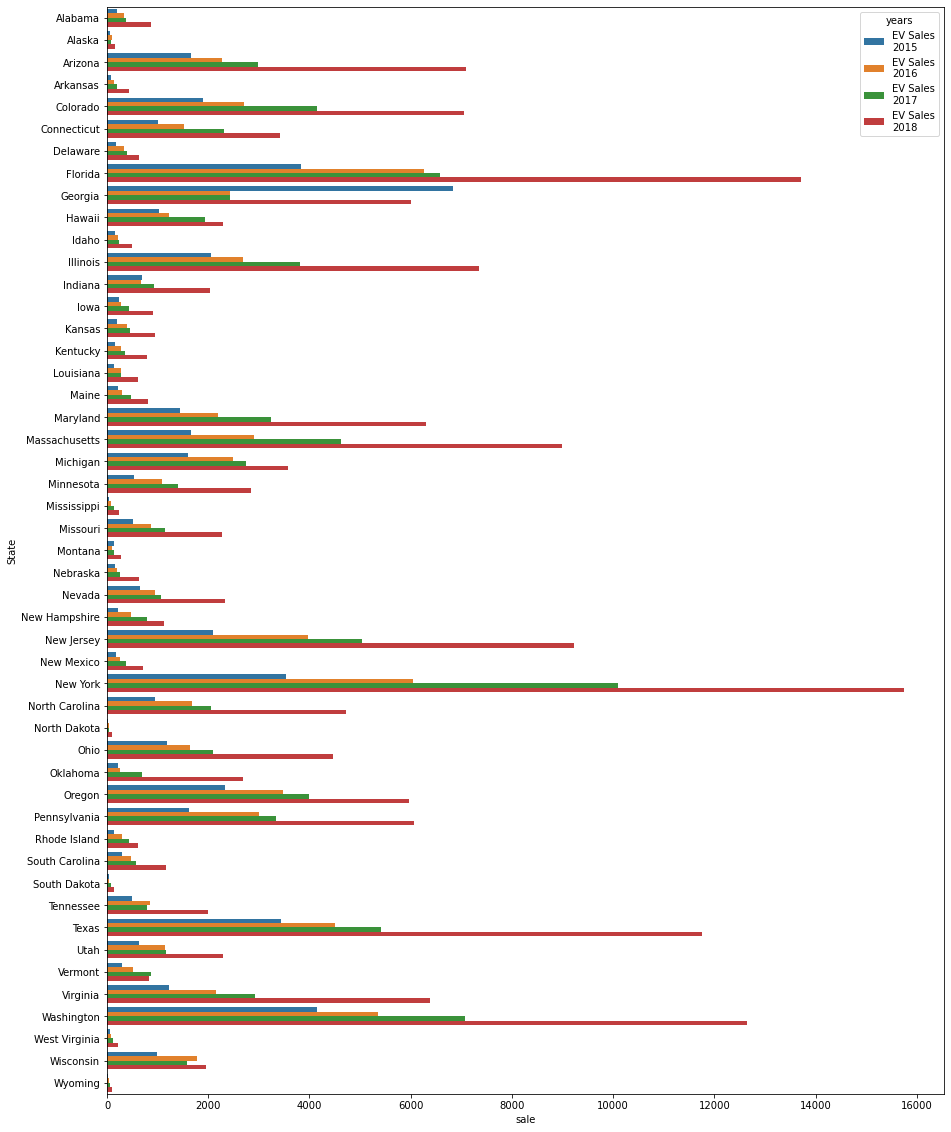

In [52]:
plt.figure(figsize=(15,20))
sns.barplot(x='sale', y='State', hue="years",data=y)

# Correlation plot

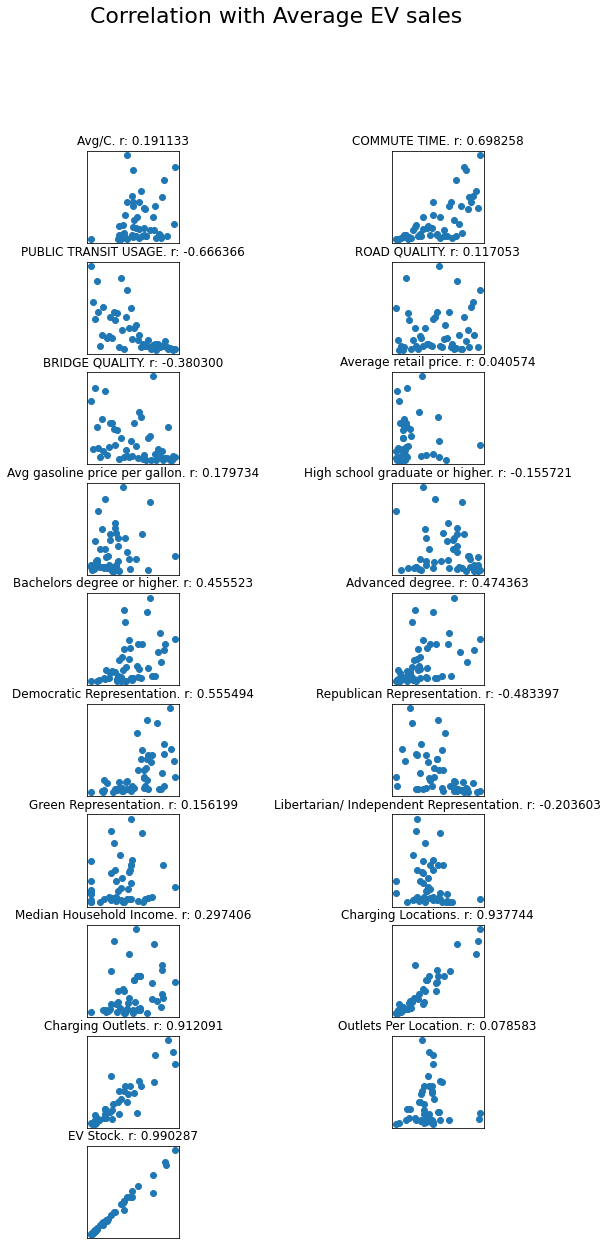

In [66]:
sale_4years = df.iloc[:,0:4]
avg_sales = sale_4years.mean(axis=1).to_frame()
avg_sales.columns = ["Avg_sales"]
avg_sales["Avg_sales"]=avg_sales["Avg_sales"].apply(lambda x : (x-avg_sales["Avg_sales"].mean())/avg_sales["Avg_sales"].std())
cont_cols = df.loc[:,['Avg/C', 'COMMUTE TIME','PUBLIC TRANSIT USAGE','ROAD QUALITY','BRIDGE QUALITY','Average retail price (cents/kWh)','Avg gasoline price per gallon',
             '% High school graduate\nor higher',"% Bachelor's degree\nor higher",'Advanced degree','Democratic Representation','Republican Representation',
             '% Green Representation','% Libertarian/ Independent Representation','Median Household Income\t $','Charging Locations',
             'Charging Outlets','Outlets Per Location','EV Stock','EVs to Charging Outlets']]
cont_cols.columns = ['Avg/C', 'COMMUTE TIME','PUBLIC TRANSIT USAGE','ROAD QUALITY','BRIDGE QUALITY','Average retail price','Avg gasoline price per gallon',
             'High school graduate or higher','Bachelors degree or higher','Advanced degree','Democratic Representation','Republican Representation',
             'Green Representation','Libertarian/ Independent Representation','Median Household Income','Charging Locations',
             'Charging Outlets','Outlets Per Location','EV Stock','EVs to Charging Outlets']
# print(avg_sales.shape)
# print(cont_cols.shape)
fig = plt.figure(figsize=(10, 20))
fig.suptitle("Correlation with Average EV sales",fontsize=22)
for i in range(1,cont_cols.shape[1]):
    ax = fig.add_subplot(10, 2, i)
    col = cont_cols.iloc[:,i-1].astype(float)
    col=col.apply(lambda x : (x-col.mean())/col.std()) # normalize
    plt.plot(col.iloc[:], avg_sales.iloc[:], 'o')
    r = avg_sales["Avg_sales"].corr(col)
    plt.title("{}. r: {:2f}".format(col.name,r))
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))



# Linear regression

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

          Avg/F  Avg/C  COMMUTE TIME  PUBLIC TRANSIT USAGE  ROAD QUALITY  \
State                                                                      
Alabama    62.8   17.1          25.0                  43.0          13.0   
Alaska     26.6   -3.0           8.0                  20.0          35.0   
Arizona    60.3   15.7          32.0                  21.0          24.0   
Arkansas   60.4   15.8          10.0                  47.0          36.0   
Colorado   45.1    7.3          33.0                  14.0          32.0   

          BRIDGE QUALITY  Average retail price (cents/kWh)  \
State                                                        
Alabama             22.0                              9.83   
Alaska              36.0                             20.22   
Arizona              4.0                             10.52   
Arkansas            17.0                              8.22   
Colorado            13.0                             10.17   

          Avg gasoline price per

<ipython-input-77-cd37c758b16c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cla['Charging Locations'] = cla['Charging Locations'].astype(int)


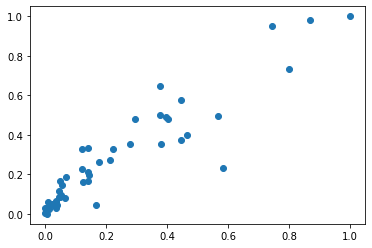

In [77]:
## pick 'charging locations' as an example
cla=df.iloc[:,[3,28]]

cla['Charging Locations'] = cla['Charging Locations'].astype(int)
# Data Normalization
cla=cla.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))
plt.scatter(cla.iloc[:,0],cla.iloc[:,1])

## Use all features 
Y = avg_sales["Avg_sales"]
lr_data = df.drop(['EV Sales\n2015',
 'EV Sales\n2016',
 'EV Sales\n2017',
 'EV Sales\n2018',
 'EV Sales\n2015 % of Total',
 'EV Sales\n2016 % of Total',
 'EV Sales\n2017 % of Total',
 'EV Sales\n2018 % of Total',
 'Avg % of Total Sales 2015-2018',
 '2017 EV\nMarket Share\nW/in State',
 '2018 EV\nMarket Share\nW/in State', 'EV Stock'],axis=1)
print(lr_data.head())

# Normalize data
min_max_scaler = preprocessing.MinMaxScaler()
lr_data_scaled = min_max_scaler.fit_transform(lr_data)
lr_data_scaled = pd.DataFrame(lr_data_scaled, columns=lr_data.columns)
print("Scaled dataset shape: " + str(lr_data_scaled.shape))
print("Avg sales shape: " + str(Y.shape))

In [78]:
cla.corr()

,EV Sales\n2018,Charging Locations
EV Sales\n2018,1.000000,0.929507
Charging Locations,0.929507,1.000000


In [86]:
lrModel = LinearRegression()
x = cla.iloc[:,0]
y = cla.iloc[:,1]
x = np.array(x).reshape((len(x), 1))
y = np.array(y).reshape((len(y), 1))
lrModel.fit(x,y)
print("One feature LR score: " + str(lrModel.score(x,y)))

# Use all features
x = lr_data_scaled
y = Y
# x = np.array(x).reshape((len(x), 1))
# y = np.array(y).reshape((len(y), 1))
lrModel.fit(x,y)
print("All feature LR score: " + str(lrModel.score(x,y)))
def merge(list1, list2): 
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
    return merged_list
print("Weights and bias")
coeffs = merge(lr_data.columns,lrModel.coef_)
for tup. in coeffs:
    print()
print(lrModel.intercept_)

One feature LR score: 0.863983538002592
All feature LR score: 0.9681872779493511
Weights and bias
[('Avg/F', -35.034790175899474), ('Avg/C', 34.739328711612124), ('COMMUTE TIME', 0.4877003417557731), ('PUBLIC TRANSIT USAGE', 0.3723253253538945), ('ROAD QUALITY', -0.079472613947676), ('BRIDGE QUALITY', 0.2378319044453816), ('Average retail price (cents/kWh)', -0.5764086319848379), ('Avg gasoline price per gallon', 0.7140207001058164), ('% High school graduate\nor higher', -0.3924354562433913), ("% Bachelor's degree\nor higher", 0.4110720767558922), ('Advanced degree', -0.2119489972266091), ('Democratic Representation', -0.1514615044175196), ('Republican Representation', -0.08037444454334279), ('% Green Representation', 0.1577380109701307), ('% Libertarian/ Independent Representation', -0.0647061454746847), ('Median Household Income\t $', 0.1796029549486429), ('Electric Vehicle Tax Credit Program (1/0)', 0.08673990831789218), ('Charging Locations', 4.99669631768694), ('Charging Outlets',

# Random forest 

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
dx = pd.read_csv('ECE 143.csv')
# dx=dx.iloc[:,[4,13,14,15,16,17]]
dx=dx.iloc[:,[4,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
dx.columns = ['EV Sales in 2018', 'Avg/C', 'COMMUTE TIME','PUBLIC TRANSIT USAGE','ROAD QUALITY','BRIDGE QUALITY','Average retail price','Avg gasoline price per gallon',
             'High school graduate or higher','Bachelors degree or higher','Advanced degree','Democratic Representation','Republican Representation',
             'Green Representation','Libertarian/ Independent Representation','Median Household Income','Tax Credit Program','Charging Locations',
             'Charging Outlets','Outlets Per Location','EV Stock','EVs to Charging Outlets']


x, y = dx.iloc[:, 1:].values, dx.iloc[:, 0].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
np.nan_to_num(x_train)
np.nan_to_num(x_test)
np.nan_to_num(y_train)
np.nan_to_num(y_test)
feat_labels = dx.columns[1:]

forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


importance： [0.05004513 0.05035401 0.04940376 0.05322673 0.05542079 0.05096607
 0.05292441 0.04830873 0.04980092 0.04929704 0.04807004 0.04843841
 0.04430483 0.04886285 0.04832332 0.01231763 0.04525903 0.04392398
 0.05599477 0.04368393 0.05107364]
 1) Outlets Per Location           0.055995
 2) BRIDGE QUALITY                 0.055421
 3) ROAD QUALITY                   0.053227
 4) Avg gasoline price per gallon  0.052924
 5) EVs to Charging Outlets        0.051074
 6) Average retail price           0.050966
 7) COMMUTE TIME                   0.050354
 8) Avg/C                          0.050045
 9) Bachelors degree or higher     0.049801
10) PUBLIC TRANSIT USAGE           0.049404
11) Advanced degree                0.049297
12) Libertarian/ Independent Representation 0.048863
13) Republican Representation      0.048438
14) Median Household Income        0.048323
15) High school graduate or higher 0.048309
16) Democratic Representation      0.048070
17) Charging Locations             0.04

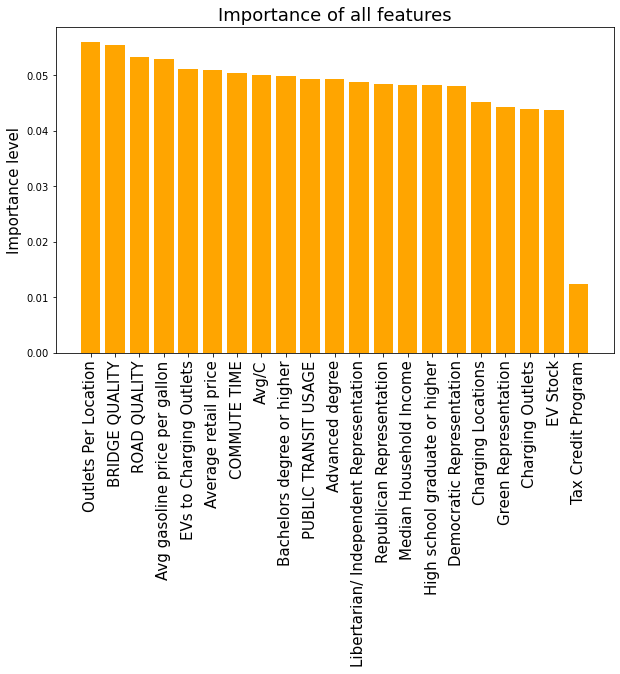

In [44]:
importances = forest.feature_importances_
print("importance：", importances)

x_columns = dx.columns[1:]
indices = np.argsort(importances)[::-1]
x_columns_indices = []
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    x_columns_indices.append(feat_labels[indices[f]])
plt.figure(figsize=(10, 6))
plt.title("Importance of all features", fontsize=18)
plt.ylabel("Importance level", fontsize=15, rotation=90)
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False
for i in range(x_columns.shape[0]):
    plt.bar(i, importances[indices[i]], color='orange', align='center')
    plt.xticks(np.arange(x_columns.shape[0]), x_columns_indices, rotation=90, fontsize=15)
plt.show()

In [45]:
df.corr()

,EV Sales\n2015,EV Sales\n2016,EV Sales\n2017,EV Sales\n2018,Avg/F,Avg/C,COMMUTE TIME,PUBLIC TRANSIT USAGE,ROAD QUALITY,BRIDGE QUALITY,...,Republican Representation,% Green Representation,% Libertarian/ Independent Representation,Median Household Income\t $,Electric Vehicle Tax Credit Program (1/0),Charging Locations,Charging Outlets,Outlets Per Location,EV Stock,EVs to Charging Outlets
EV Sales\n2015,1.000000,0.825507,0.775936,0.810831,0.259046,0.257972,0.609877,-0.513593,-0.031773,-0.433771,...,-0.255917,0.042907,-0.146597,0.103865,0.535104,0.844617,0.852147,0.117576,0.915470,0.386505
EV Sales\n2016,0.825507,1.000000,0.974172,0.974009,0.173734,0.172566,0.663316,-0.659532,0.121202,-0.377776,...,-0.355184,0.171789,-0.197083,0.253099,0.544236,0.921527,0.889917,0.050317,0.972304,0.468509
EV Sales\n2017,0.775936,0.974172,1.000000,0.979015,0.114971,0.113678,0.684522,-0.680419,0.165789,-0.313328,...,-0.391109,0.218283,-0.167293,0.303727,0.558089,0.903930,0.866917,0.041797,0.957838,0.465400
EV Sales\n2018,0.810831,0.974009,0.979015,1.000000,0.204049,0.202229,0.692599,-0.658809,0.129129,-0.368449,...,-0.334191,0.123080,-0.181948,0.261975,0.540602,0.930173,0.903977,0.074996,0.971595,0.464267
Avg/F,0.259046,0.173734,0.114971,0.204049,1.000000,0.999984,0.375484,-0.008305,0.037900,-0.293809,...,0.098399,-0.202232,-0.438688,-0.343529,-0.060037,0.262684,0.276077,0.242333,0.209299,-0.029102
Avg/C,0.257972,0.172566,0.113678,0.202229,0.999984,1.000000,0.374843,-0.007315,0.038334,-0.293539,...,0.081429,-0.200714,-0.431728,-0.328777,-0.060995,0.260978,0.274550,0.241630,0.207745,-0.029829
COMMUTE TIME,0.609877,0.663316,0.684522,0.692599,0.375484,0.374843,1.000000,-0.710521,0.293818,-0.268977,...,-0.469823,0.167842,-0.417828,0.333457,0.493837,0.640815,0.617344,0.035039,0.691827,0.386986
PUBLIC TRANSIT USAGE,-0.513593,-0.659532,-0.680419,-0.658809,-0.008305,-0.007315,-0.710521,1.000000,-0.246918,0.414879,...,0.628117,-0.341956,0.171145,-0.624370,-0.593928,-0.580837,-0.564782,-0.100282,-0.642969,-0.498970
ROAD QUALITY,-0.031773,0.121202,0.165789,0.129129,0.037900,0.038334,0.293818,-0.246918,1.000000,0.178843,...,-0.283355,0.284603,0.066744,0.207846,0.296466,-0.008611,-0.000530,0.028980,0.077726,0.351736
BRIDGE QUALITY,-0.433771,-0.377776,-0.313328,-0.368449,-0.293809,-0.293539,-0.268977,0.414879,0.178843,1.000000,...,0.294198,-0.071261,0.144855,-0.210114,-0.261383,-0.450159,-0.456550,-0.178454,-0.392988,-0.070015
